# Instacart Final Analysis 

## This script will contain the following: 
1. Import libraries and data 
2. Address any PII 
3. Create a region column 
4. Create exclusion flag for low activity customers 
5. Create a profilng variable 
6. Visualizations of profiles 
7. Aggregate functions for profiles
8. Comparison between customer profiles and region and departments 
9. Visuals of comparisons. 

### Importing Libraries and Data 

In [1]:
#import libraries 
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy 


In [2]:
#Set Path 
path= r'C:\Users\hmaio\Documents\4.0 Instacart Project'

In [3]:
# Import Data 
df_final = pd.read_pickle(os.path.join(path, '4.0 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
df_final.shape

(30328763, 32)

In [5]:
df_final.head()

,user_id,First_Name,Last_Name,Gender,STATE,Age,date_joined,no_of_dependants,fam_status,income,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_days_since_order,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Regularly busy,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Least busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer


### Addressing PII 

In [4]:
# removing first name and last name columns as they pose a security issue 
df_instacart = df_final.drop(columns = ['First_Name', 'Last_Name'])

In [7]:
# checking resutls 
df_instacart.head() 

,user_id,Gender,STATE,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_days_since_order,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,both,Mid-Range Product,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,both,Mid-Range Product,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,both,Mid-Range Product,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,both,Mid-Range Product,Regularly busy,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,both,Mid-Range Product,Least busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer


### Creating region column 

In [5]:
#creating a region column 
region=[] 
for value in df_instacart['STATE']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [6]:
# adding region column to dataframe
df_instacart['region'] = region

In [10]:
#checking results 
df_instacart.head() 

,user_id,Gender,STATE,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_days_since_order,frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-Range Product,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-Range Product,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-Range Product,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-Range Product,Regularly busy,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-Range Product,Least busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest


In [11]:
# checking results 
df_instacart['region'].value_counts(dropna=False)

South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: region, dtype: int64

In [12]:
# Comparing spending habits by region 
crosstab = pd.crosstab(df_instacart['region'], df_instacart['spender_flag'], dropna = False)

In [13]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,148321,6959265
Northeast,102905,5253367
South,197110,9902707
West,149922,7615166


The spending habits between U.S regions appear to be fairly equal. 

### Creating Exclusion Flag for low activity customers (< 5 orders)

In [7]:
# create customer activity flag for low activity customers 
df_instacart.loc[df_instacart['max_order'] < 5, 'customer_activity'] = 'Low Activity'

In [8]:
# create customer activity flag for regular activity customers 
df_instacart.loc[df_instacart['max_order'] >= 5, 'customer_activity'] = 'Regular Activity'

In [16]:
# check results 
df_instacart.shape

(30328763, 32)

In [17]:
df_instacart.head()

,user_id,Gender,STATE,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_days_since_order,frequency_flag,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity


In [18]:
df_instacart['customer_activity'].value_counts(dropna=False)

Regular Activity    29303281
Low Activity         1025482
Name: customer_activity, dtype: int64

In [9]:
# create subset of low activity customers 
df_low_activity = df_instacart[df_instacart['customer_activity']== 'Low Activity']

In [20]:
# checking results 
df_low_activity.shape

(1025482, 32)

In [10]:
#create subset of regular activity customers
df_reg_activity= df_instacart[df_instacart['customer_activity']== 'Regular Activity']

In [22]:
# checking results 
df_reg_activity.shape 

(29303281, 32)

In [11]:
# export subset of low activity customers 
df_low_activity.to_pickle(os.path.join(path, '4.0 Data', 'Prepared Data', 'low_activity_customers.pkl'))

### Creating a profiling variables

#### Age Profile

In [24]:
# Checking age ranges in database
df_reg_activity['Age'].value_counts().sort_index()

18    453014
19    469575
20    453486
21    463443
22    465069
       ...  
77    451336
78    445557
79    481628
80    467074
81    459639
Name: Age, Length: 64, dtype: int64

In [12]:
# Creating age profile
age_profile = []

for value in df_reg_activity['Age']:
    if (value >= 18) and (value <= 24):
        age_profile.append('Young Adult')
    elif (value >= 25) and (value <= 64):
        age_profile.append('Adult')
    elif (value >= 65):
        age_profile.append('Senior')

In [13]:
# adding age profile as column 
df_reg_activity['age_profile'] = age_profile

C:\Users\hmaio\AppData\Local\Temp\ipykernel_9720\67724849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_activity['age_profile'] = age_profile


In [27]:
df_reg_activity.head()

,user_id,Gender,STATE,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_days_since_order,frequency_flag,region,customer_activity,age_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity,Adult
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity,Adult
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity,Adult
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity,Adult
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,Regular Activity,Adult


In [28]:
# checking results 
df_reg_activity['age_profile'].value_counts()

Adult          18316877
Senior          7754560
Young Adult     3231844
Name: age_profile, dtype: int64

#### Income Profile 

In [29]:
#view income range
df_reg_activity['income'].value_counts().sort_index()

25903      18
25911      24
25937      34
25941      27
25955     389
         ... 
584097    815
590790     41
591089    170
592409    287
593901    622
Name: income, Length: 96069, dtype: int64

In [14]:
#creating income variable 
df_reg_activity.loc[df_reg_activity['income'] < 33000, 'income_profile'] = 'Low Income'

C:\Users\hmaio\AppData\Local\Temp\ipykernel_9720\2133398913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_activity.loc[df_reg_activity['income'] < 33000, 'income_profile'] = 'Low Income'


In [15]:
df_reg_activity.loc[(df_reg_activity['income'] >=33000) & (df_reg_activity['income'] < 55000), 'income_profile'] = 'Lower Middle Income'

In [16]:
df_reg_activity.loc[(df_reg_activity['income'] >=55000) & (df_reg_activity['income'] < 106000), 'income_profile'] = 'Middle Income'

In [17]:
df_reg_activity.loc[(df_reg_activity['income'] >=106000) & (df_reg_activity['income'] < 350000), 'income_profile'] = ' Upper Middle Income'

In [18]:
df_reg_activity.loc[df_reg_activity['income'] >= 350000, 'income_profile'] = 'Upper Income'

In [ ]:
#checking results 
df_reg_activity['income_profile'].value_counts()

#### Creating profile for number of dependents 

In [19]:
# fixing typo in df  dependants to dependents 
df_reg_activity.rename(columns = {'no_of_dependants' : 'no_of_dependents'}, inplace=True)

C:\Users\hmaio\AppData\Local\Temp\ipykernel_9720\1858835464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_activity.rename(columns = {'no_of_dependants' : 'no_of_dependents'}, inplace=True)


In [ ]:
#viewing no_of_dependents column 
df_reg_activity['no_of_dependents'].value_counts()

In [20]:
#creating no_of_dependents variable 
df_reg_activity.loc[df_reg_activity['no_of_dependents'] < 1, 'dependent_profile'] = 'Individual'

C:\Users\hmaio\AppData\Local\Temp\ipykernel_9720\2954840525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_activity.loc[df_reg_activity['no_of_dependents'] < 1, 'dependent_profile'] = 'Individual'


In [21]:
df_reg_activity.loc[df_reg_activity['no_of_dependents'] >= 1, 'dependent_profile'] = 'Family'

In [ ]:
# checking results 
df_reg_activity['dependent_profile'].value_counts()

### Visualizations of Profiles

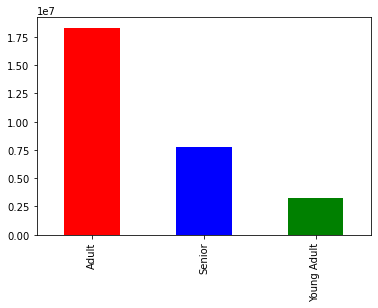

In [22]:
# Bar chart of Age Profile 
age_profile_bar =df_reg_activity['age_profile'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

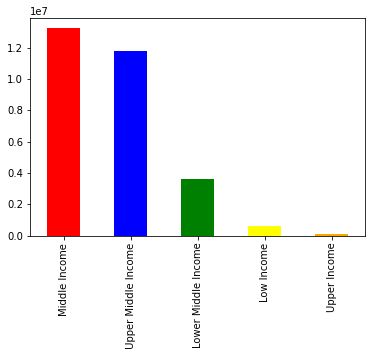

In [23]:
# create bar chart for income profile
income_profile_bar =df_reg_activity['income_profile'].value_counts().plot.bar(color = ['red', 'blue', 'green', 'yellow', 'orange'])

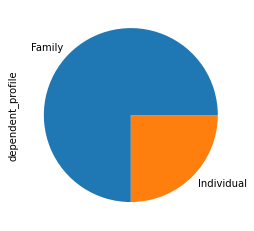

In [24]:
#create pie chart for dependents profile
dependents_profile_pie =df_reg_activity['dependent_profile'].value_counts().plot.pie()

### Aggregates of Profiles

In [25]:
# find aggregate values of frequency of order by income
df_reg_activity.groupby('income_profile').agg({'median_days_since_order': ['mean', 'min', 'max']})

median_days_since_order           
                                        mean  min   max
income_profile                                         
 Upper Middle Income                9.664062  0.0  30.0
Low Income                         10.546875  0.0  30.0
Lower Middle Income                10.148438  0.0  30.0
Middle Income                       9.671875  0.0  30.0
Upper Income                        9.062500  1.0  30.0

In [26]:
# find aggregate values of frequency of order by age

df_reg_activity.groupby('age_profile').agg({'median_days_since_order': ['mean', 'min', 'max']})

median_days_since_order           
                               mean  min   max
age_profile                                   
Adult                      9.765625  0.0  30.0
Senior                     9.718750  0.0  30.0
Young Adult                9.695312  0.0  30.0

In [27]:
# find aggregate values of frequency of order by dependents

df_reg_activity.groupby('dependent_profile').agg({'median_days_since_order': ['mean', 'min', 'max']})

median_days_since_order           
                                     mean  min   max
dependent_profile                                   
Family                           9.750000  0.0  30.0
Individual                       9.726562  0.0  30.0

In [28]:
# find aggregate values of average amount spent by age profile

df_reg_activity.groupby('age_profile').agg({'avg_spent': ['mean', 'min', 'max']})

avg_spent                     
                  mean    min           max
age_profile                                
Adult        11.927791  1.000  14292.911429
Senior       11.729477  1.100  13468.890385
Young Adult  12.436005  1.925   9529.892857

In [29]:
# find aggregate values of average amount spent by income profile

df_reg_activity.groupby('income_profile').agg({'avg_spent': ['mean', 'min', 'max']})

avg_spent                        
                            mean       min           max
income_profile                                          
 Upper Middle Income   15.743907  5.570000  14292.911429
Low Income              6.497206  1.100000      7.910000
Lower Middle Income     6.984176  1.000000     15.488889
Middle Income           8.696558  1.100000   4623.173846
Upper Income          281.268796  6.841748   7900.663158

In [30]:
# find aggregate values of average amount spent by dependent profile

df_reg_activity.groupby('dependent_profile').agg({'avg_spent': ['mean', 'min', 'max']})

avg_spent                   
                        mean  min           max
dependent_profile                              
Family             11.876543  1.0   9529.892857
Individual         12.095844  1.0  14292.911429

In [31]:
#export data
df_reg_activity.to_pickle(os.path.join(path, '4.0 Data','Prepared Data', 'df_reg_activity.pkl'))

In [32]:
#export age profile bar chart 
age_profile_bar.figure.savefig(os.path.join(path, '4.0 Analysis','Visualizations', 'age_profile_bar.png'))

In [33]:
# export income profile bar chart
income_profile_bar.figure.savefig(os.path.join(path, '4.0 Analysis','Visualizations', 'income_profile_bar.png'))

In [35]:
# export dependent profile pie chart 
dependents_profile_pie.figure.savefig(os.path.join(path, '4.0 Analysis','Visualizations', 'dependent_profile_pie.png'))